In [1]:
import pandas

import swasputils

In [2]:
zoo_subjects = swasputils.ZooniverseSubjects()

C:\Users\anm83\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\anm83\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<AxesSubplot:title={'center':'Active subjects in workflows'}>

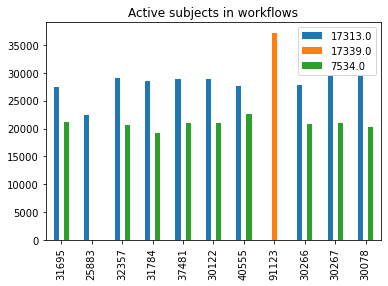

In [3]:
sets_in_workflows = set()
for workflow_id, wf_subjects in zoo_subjects.workflows.items():
    sets_in_workflows |= set(wf_subjects.subject_sets)

workflow_counts = {}
for workflow_id, wf_subjects in zoo_subjects.workflows.items():
    workflow_counts[workflow_id] = []
    for set_id in sets_in_workflows:
        subjects = wf_subjects.get_subject_set(set_id)
        workflow_counts[workflow_id].append(len(subjects.active.df))

pandas.DataFrame(
    workflow_counts,
    index=list(map(str, sets_in_workflows))
).plot.bar( 
    title='Active subjects in workflows',
)